In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
df_program = pd.read_csv('Program_students.csv')
df_teacher = pd.read_csv('Same_teacher.csv')
df_students = pd.read_csv('Same_Students.csv')
df_year = pd.read_csv('Same_Year.csv')

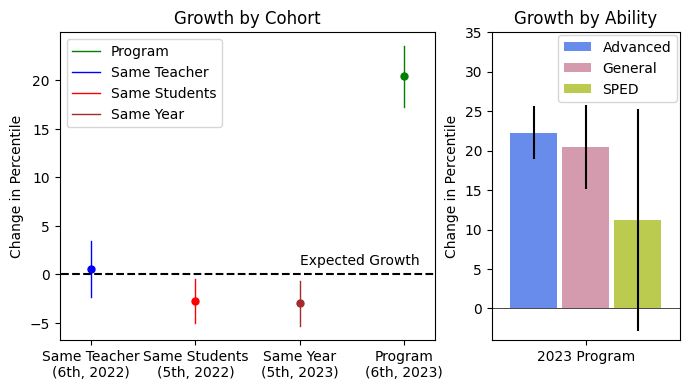

In [4]:
fig, axs = plt.subplots(1, 2, figsize=(8, 4),gridspec_kw={'width_ratios': [2, 1]})

var = 'Growth Percentile'

# All 6th graders 2023
mean = df_program[var].mean()
se = df_program[var].std() / np.sqrt(len(df_program[var]))
axs[0].plot([3], [mean], marker='o', markersize=5, color="green")
axs[0].plot([3, 3], [mean - 1.96 * se, mean + 1.96 * se], color="green", linewidth=1, label='Program')

# All 6th graders 2022
mean = df_teacher[var].mean()
se = df_teacher[var].std() / np.sqrt(len(df_teacher[var]))
axs[0].plot([0], [mean], marker='o', markersize=5, color="blue")
axs[0].plot([0, 0], [mean - 1.96 * se, mean + 1.96 * se], color="blue", linewidth=1, label='Same Teacher')

# 5th graders 2022
mean = df_students[var].mean()
se = df_students[var].std() / np.sqrt(len(df_students[var]))
axs[0].plot([1], [mean], marker='o', markersize=5, color="red")
axs[0].plot([1, 1], [mean - 1.96 * se, mean + 1.96 * se], color="red", linewidth=1, label='Same Students')


# 5th graders 2023
mean = df_year[var].mean()
se = df_year[var].std() / np.sqrt(len(df_year[var]))

axs[0].plot([2], [mean], marker='o', markersize=5, color="Brown")
axs[0].plot([2, 2], [mean - 1.96 * se, mean + 1.96 * se], color="Brown", linewidth=1, label='Same Year')
axs[0].set_xticks([0, 1, 2, 3])
axs[0].set_xticklabels(['Same Teacher\n(6th, 2022)', 'Same Students\n(5th, 2022)', 'Same Year\n(5th, 2023)', 'Program\n(6th, 2023)',])
axs[0].legend()
axs[0].set_ylabel('Change in Percentile')
axs[0].plot([-0.5,4.5],[0,0], color='black', linestyle='--')
axs[0].text(2,1,'Expected Growth')
axs[0].set_xlim(-0.3,3.3)


axs[1].plot([-1,7],[0,0], color='black', linestyle='-',lw=0.5)

# Advanced students 2023
df_t = df_program.loc[df_program.Level == 'Advanced']
axs[1].bar(0, df_t[var].mean(), yerr=1.96 * df_t[var].std() / np.sqrt(len(df_t[var])), color='#678CEC', label='Advanced',width=.9)

# General Students 2023
df_t = df_program.loc[df_program.Level == 'General']
axs[1].bar(1, df_t[var].mean(), yerr=1.96 * df_t[var].std() / np.sqrt(len(df_t[var])), color='#D49BAE', label='General',width=.9)

# SPED Students 2023
df_t = df_program.loc[df_program.Level == 'SPED']
axs[1].bar(2, df_t[var].mean(), yerr=1.96 * df_t[var].std() / np.sqrt(len(df_t[var])), color='#BBCB50', label='SPED',width=.9)

# Place the legend outside the figure
axs[1].legend(loc='upper right', borderaxespad=0.2)
axs[1].set_xticks([1])
axs[1].set_xticklabels(['2023 Program'])
axs[1].set_xlim(-0.8,2.8)
axs[1].set_ylim(-4,35)
axs[1].set_ylabel('Change in Percentile')
axs[1].set_title('Growth by Ability')
axs[0].set_title('Growth by Cohort')

plt.show()

In [5]:
# Comparisons to same teacher, students, and year along with general improvement

# All 6th graders 2023
df_program = df_program.dropna(subset=[var])

print('Program students')
print(df_program['StartPercentile'].mean(),df_program['EndPercentile'].mean())
print(df_program['Growth Percentile'].mean(), df_program['Growth Percentile'].std())
print(stats.ttest_1samp(df_program[var], 0))

print('Medians',df_program.StartPercentile.median(), df_program.EndPercentile.median())
print(stats.wilcoxon(df_program[var]))


# All 6th graders 2022
df_teacher = df_teacher.dropna(subset=[var])
print('\n 2022 6th grade',df_teacher[var].mean(), df_teacher[var].std())
print(stats.ttest_ind(df_program[var], df_teacher[var]))
print(df_teacher[var].median())
print(stats.mannwhitneyu(df_program[var], df_teacher[var]))

# All 5th graders 2022
df_students = df_students.dropna(subset=[var])
print('\n 2022 5th grade',df_students[var].mean(), df_students[var].std())
print(stats.ttest_ind(df_program[var], df_students[var]))
print(df_students[var].median())
print(stats.mannwhitneyu(df_program[var], df_students[var]))


# All 5th graders in 2023
df_year = df_year.dropna(subset=[var])
print('\n 2022 5th grade',df_year[var].mean(), df_year[var].std())
print(stats.ttest_ind(df_program[var], df_year[var]))
print(df_year[var].median())
print(stats.mannwhitneyu(df_program[var], df_year[var]))

Program students
46.425925925925924 66.80555555555556
20.37962962962963 16.830500568736923
Ttest_1sampResult(statistic=12.583780433787892, pvalue=7.820909456122705e-23)
Medians 46.0 73.0
WilcoxonResult(statistic=233.0, pvalue=2.331202577720909e-16)

 2022 6th grade 0.5888888888888889 14.090314184138704
Ttest_indResult(statistic=8.8626584443314, pvalue=4.768613528323855e-16)
0.0
MannwhitneyuResult(statistic=7947.0, pvalue=1.469263687047188e-14)

 2022 5th grade -2.730769230769231 12.132945415317872
Ttest_indResult(statistic=11.431577641523665, pvalue=7.614618414592299e-24)
-1.0
MannwhitneyuResult(statistic=9777.5, pvalue=1.1392752150893879e-20)

 2022 5th grade -2.9763779527559056 13.485126766905456
Ttest_indResult(statistic=11.806177094674913, pvalue=1.60107474657069e-25)
-3.0
MannwhitneyuResult(statistic=11853.5, pvalue=6.581831230832205e-22)


In [6]:
# Comparing growth by ability
df_a = df_program.loc[df_program.Level == 'Advanced']
print(df_a['Growth Percentile'].mean(), df_a['Growth Percentile'].std())

df_g = df_program.loc[df_program.Level == 'General']
print(df_g['Growth Percentile'].mean(), df_g['Growth Percentile'].std())

df_t = df_program.loc[df_program.Level == 'SPED']
print(df_t['Growth Percentile'].mean(), df_t['Growth Percentile'].std())

print(df_a['Growth Percentile'].median(),df_g['Growth Percentile'].median(),df_t['Growth Percentile'].median())


print(stats.f_oneway(df_a['Growth Percentile'], df_g['Growth Percentile'], df_t['Growth Percentile']))
print(stats.kruskal(df_a['Growth Percentile'], df_g['Growth Percentile'], df_t['Growth Percentile']))

22.26923076923077 12.518402743154535
20.444444444444443 18.79743158900796
11.181818181818182 23.777376566047742
21.5 21.0 5.0
F_onewayResult(statistic=2.0078112251344193, pvalue=0.1394053407120311)
KruskalResult(statistic=4.099051083069687, pvalue=0.12879599744467524)
